In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("/content/Salary_dataset.csv")

In [14]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [15]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [16]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [17]:
df = df.iloc[:, 1::]

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
st = MinMaxScaler()

In [20]:
df['salary_'] = st.fit_transform(df[['Salary']])

In [21]:
df.head(3)

,YearsExperience,Salary,salary_
0,1.2,39344.0,0.019041
1,1.4,46206.0,0.100094
2,1.6,37732.0,0.000000


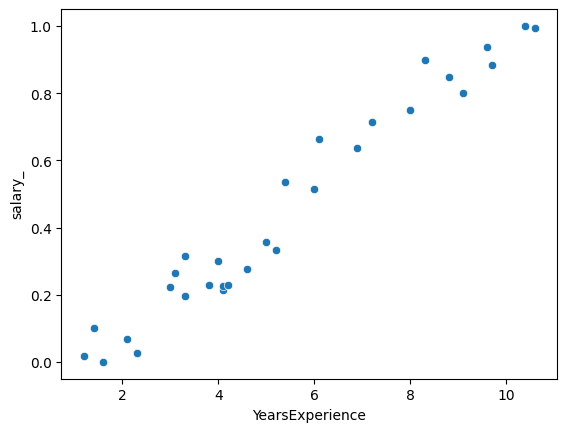

In [22]:
sns.scatterplot(x = 'YearsExperience', y = 'salary_', data = df)
plt.show()

In [23]:
x = df[['YearsExperience']]
y = df['salary_']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state= 75)

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
lr.score(x_test, y_test)*100

96.52242905568413

In [28]:
lr.predict([[1.6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.01144039])

In [32]:
y_prd = lr.predict(x)

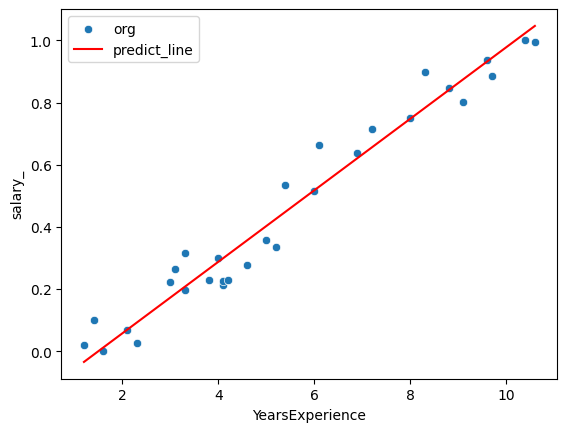

In [39]:
sns.scatterplot(x = 'YearsExperience', y = 'salary_', data = df)
plt.plot(df['YearsExperience'],y_prd, c='red' )
plt.legend(['org', 'predict_line'])
plt.show()